In [57]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

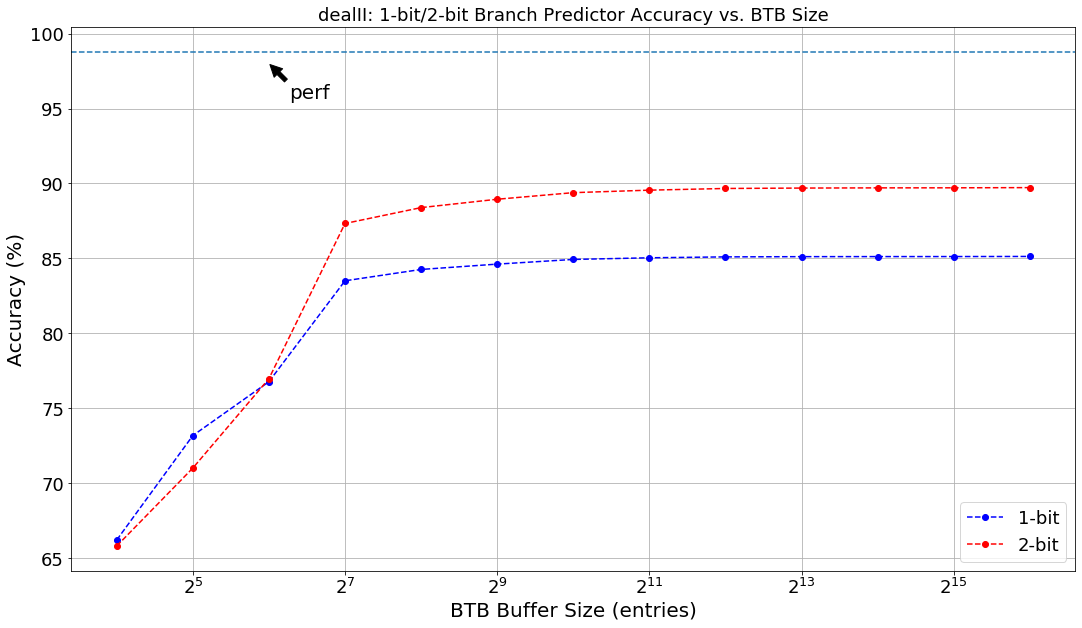

In [58]:
data = []
with open('dealii/1bit_merged.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        row = list(map(float, row))
        data.append(row)

data_2bit = []
with open('dealii/2bit_merged.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        row = list(map(float, row))
        data_2bit.append(row)

xrow = [2 ** x for x in np.transpose(data)[0]]
yrow = [100 * y for y in np.transpose(data)[1]]
xrow_2bit = [2 ** x for x in np.transpose(data_2bit)[0]]
yrow_2bit = [100 * y for y in np.transpose(data_2bit)[1]]

fig, ax = plt.subplots(figsize=(18,10))
ax.plot(xrow, yrow, linestyle='--', marker='o', color='b')
ax.plot(xrow_2bit, yrow_2bit, linestyle='--', marker='o', color='r')
plt.axhline(y=98.78, linestyle='--')
ax.set_xscale('log', basex=2)
#ax.set_ylim(88,93)
ax.set_ylabel("Accuracy (%)",fontsize=20)
ax.set_xlabel("BTB Buffer Size (entries)",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid()
ax.legend(['1-bit', '2-bit'], prop={'size': 18})
ax.set_title('dealII: 1-bit/2-bit Branch Predictor Accuracy vs. BTB Size', fontsize=18)
ax.annotate('perf',
            xy=(64,98), xycoords='data',arrowprops=dict(facecolor='black', shrink=0.05),
            xytext=(20, -35), textcoords='offset points',fontsize=20)
plt.savefig('1bit2bit_dealII.png')

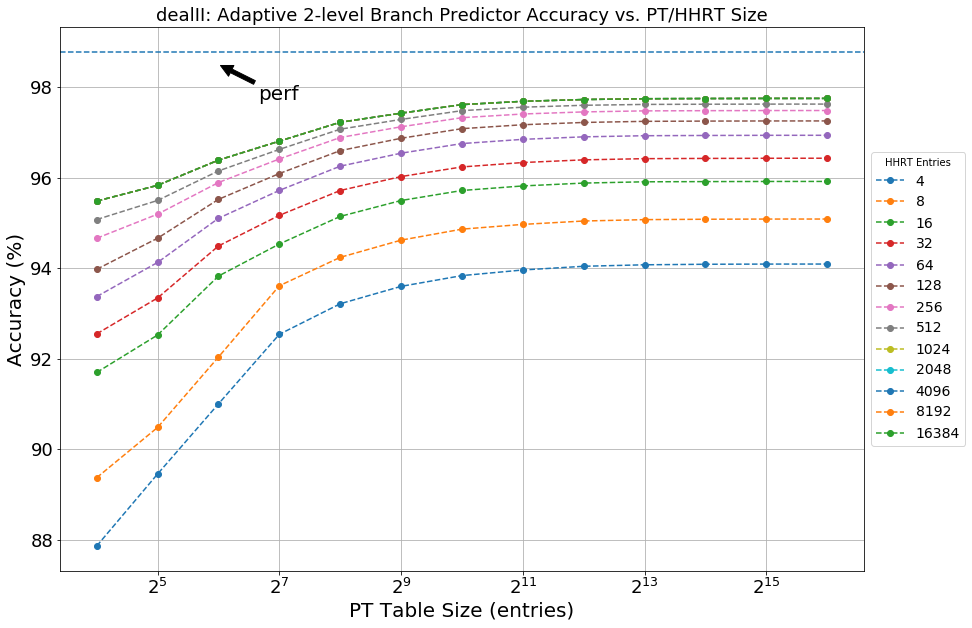

In [59]:
data = []

for i in range(4,17):
    filedata = []
    filename = 'dealii/adaptive_merged_{}.csv'.format(str(i))
    with open(filename) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            row = list(map(float, row))
            filedata.append(row)
    data.append(filedata)

ctr = 4
fig, ax = plt.subplots(figsize=(18,10))
for d in data:
    xrow = [2 ** x for x in np.transpose(d)[0]]
    yrow = [100 * y for y in np.transpose(d)[1]]
    ax.plot(xrow, yrow, linestyle='--', marker='o', label = ctr)
    ctr = ctr * 2
    ax.set_xscale('log', basex=2)
    ax.set_ylabel("Accuracy (%)",fontsize=20)
    ax.set_xlabel("PT Table Size (entries)",fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    ax.grid()
    ax.set_title('dealII: Adaptive 2-level Branch Predictor Accuracy vs. PT/HHRT Size', fontsize=18)


#ax.set_ylim(97,100)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="HHRT Entries",prop={'size': 14})
ax.annotate('perf',
            xy=(64,98.5), xycoords='data',arrowprops=dict(facecolor='black', shrink=0.05),
            xytext=(40, -35), textcoords='offset points',fontsize=20)
plt.axhline(y=98.78, linestyle='--')
plt.savefig('adaptive_dealii.png')

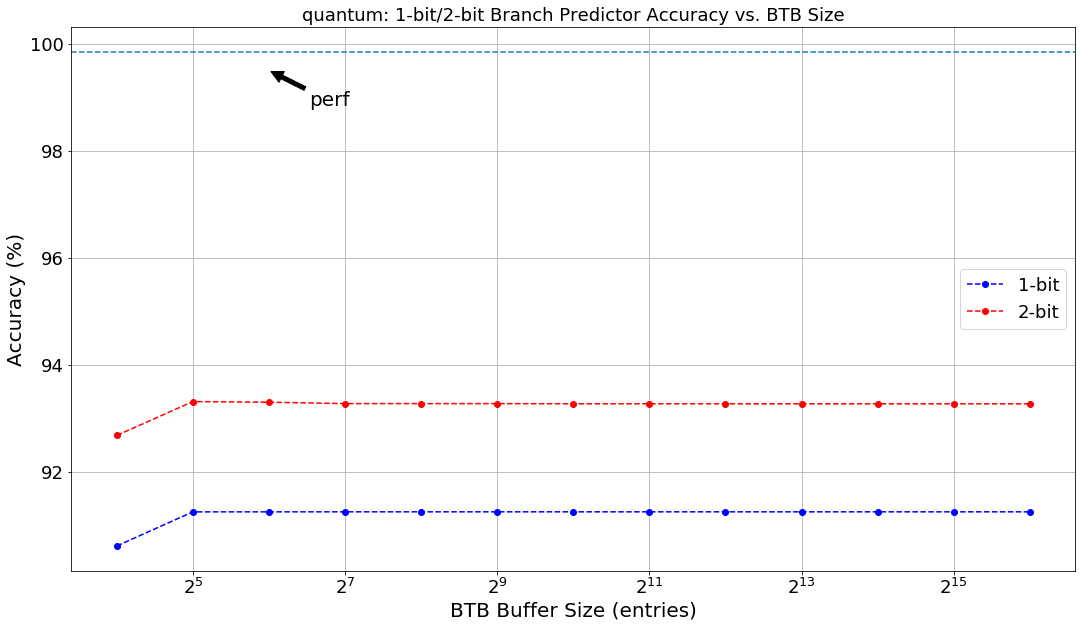

In [60]:
data = []
with open('quantum/1bit_merged.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        row = list(map(float, row))
        data.append(row)

data_2bit = []
with open('quantum/2bit_merged.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        row = list(map(float, row))
        data_2bit.append(row)

xrow = [2 ** x for x in np.transpose(data)[0]]
yrow = [100 * y for y in np.transpose(data)[1]]
xrow_2bit = [2 ** x for x in np.transpose(data_2bit)[0]]
yrow_2bit = [100 * y for y in np.transpose(data_2bit)[1]]

fig, ax = plt.subplots(figsize=(18,10))
ax.plot(xrow, yrow, linestyle='--', marker='o', color='b', label='1-bit')
ax.plot(xrow_2bit, yrow_2bit, linestyle='--', marker='o', color='r', label = '2-bit')
plt.axhline(y=99.85, linestyle='--')
ax.set_xscale('log', basex=2)
#ax.set_ylim(88,93)
ax.set_ylabel("Accuracy (%)",fontsize=20)
ax.set_xlabel("BTB Buffer Size (entries)",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid()
ax.legend(prop={'size': 18})
ax.annotate('perf',
            xy=(64,99.5), xycoords='data',arrowprops=dict(facecolor='black', shrink=0.05),
            xytext=(40, -35), textcoords='offset points',fontsize=20)
ax.set_title('quantum: 1-bit/2-bit Branch Predictor Accuracy vs. BTB Size', fontsize=18)
plt.savefig('1bit2bit_quantum.png')

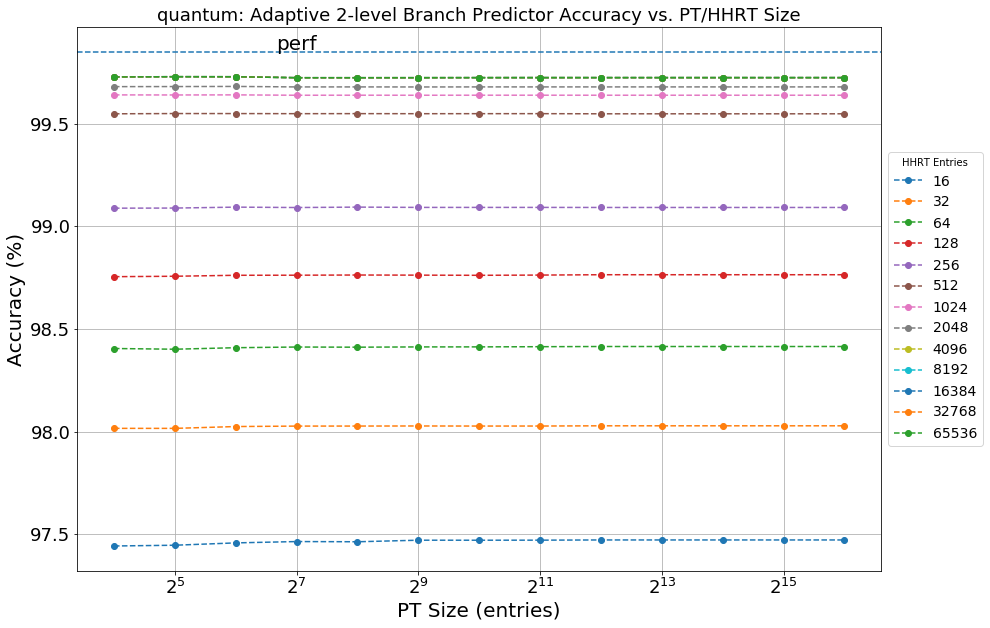

In [61]:
data = []

for i in range(4,17):
    filedata = []
    filename = 'quantum/adaptive_merged_{}.csv'.format(str(i))
    with open(filename) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            row = list(map(float, row))
            filedata.append(row)
    data.append(filedata)

fig, ax = plt.subplots(figsize=(18,10))
ctr = 16
for d in data:
    xrow = [2 ** x for x in np.transpose(d)[0]]
    yrow = [100 * y for y in np.transpose(d)[1]]
    ax.plot(xrow, yrow, linestyle='--', marker='o', label=ctr)
    ctr = ctr * 2
    ax.set_xscale('log', basex=2)
    ax.set_ylabel("Accuracy (%)",fontsize=20)
    ax.set_xlabel("PT Size (entries)",fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    ax.grid()
    ax.set_title('quantum: Adaptive 2-level Branch Predictor Accuracy vs. PT/HHRT Size', fontsize=18)


#ax.set_ylim(97,100)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="HHRT Entries",prop={'size': 14})

#ax.legend(prop={'size': 18}, "title")
ax.axhline(y=99.85, linestyle='--')
ax.annotate('perf',
            xy=(64,99.9), xycoords='data',
            xytext=(40, -8), textcoords='offset points',fontsize=20)
plt.savefig('adaptive_quantum.png')

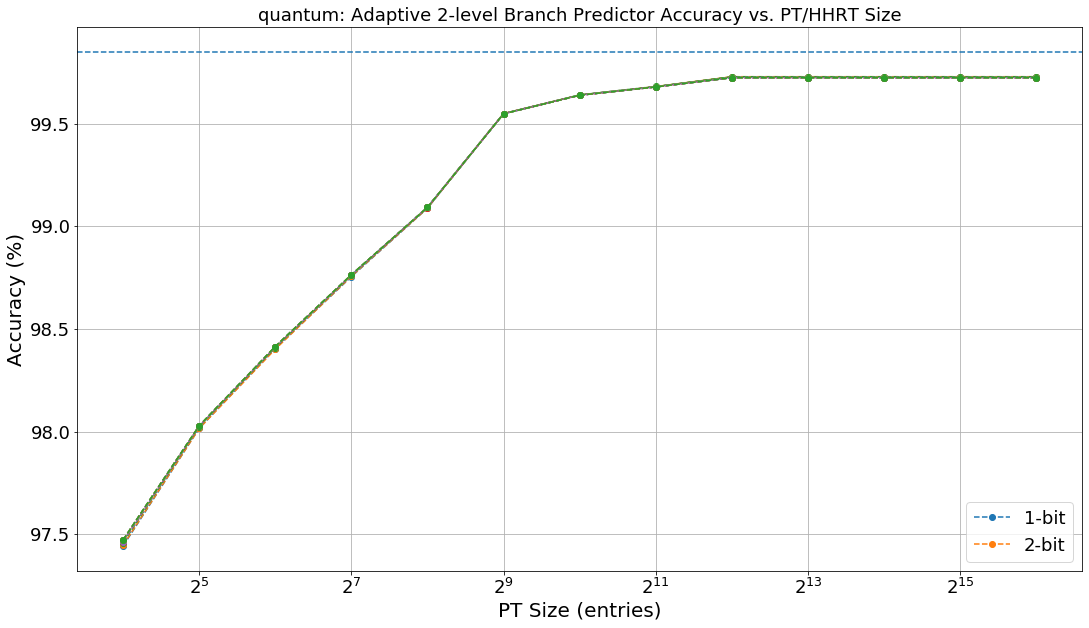

In [62]:
data = []

for i in range(4,17):
    filedata = []
    filename = 'quantum/adaptive_merged_pt_{}.csv'.format(str(i))
    with open(filename) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            row = list(map(float, row))
            filedata.append(row)
    data.append(filedata)

fig, ax = plt.subplots(figsize=(18,10))
for d in data:
    xrow = [2 ** x for x in np.transpose(d)[0]]
    yrow = [100 * y for y in np.transpose(d)[1]]
    ax.plot(xrow, yrow, linestyle='--', marker='o')
    ax.set_xscale('log', basex=2)
    ax.set_ylabel("Accuracy (%)",fontsize=20)
    ax.set_xlabel("PT Size (entries)",fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    ax.grid()
    ax.set_title('quantum: Adaptive 2-level Branch Predictor Accuracy vs. PT/HHRT Size', fontsize=18)


#ax.set_ylim(97,100)
ax.legend(['1-bit', '2-bit'], prop={'size': 18})
plt.axhline(y=99.85, linestyle='--')
plt.savefig('adaptive_quantum.png')